# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [48]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [49]:
# ! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

In [50]:
# df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

data_folder = "data"
formatted_target_name = 'Kallikrein_1'
df = pd.read_csv(f'{data_folder}/{formatted_target_name}_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [51]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
333,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
334,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
335,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [52]:
Y = df.pIC50
Y

0      5.677781
1      5.236572
2      5.677781
3      6.602060
4      5.004804
         ...   
332    4.397940
333    5.397940
334    4.397940
335    8.537602
336    6.000000
Name: pIC50, Length: 337, dtype: float64

### **3.3. Let's examine the data dimension**

In [53]:
X.shape

(337, 881)

In [54]:
Y.shape

(337,)

### **3.4. Remove low variance features**

In [55]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [56]:
X.shape

(337, 118)

## **4. Data split (80/20 ratio)**

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [58]:
X_train.shape, Y_train.shape

((269, 118), (269,))

In [59]:
X_test.shape, Y_test.shape

((68, 118), (68,))

## **5. Building a Regression Model using Random Forest**

In [60]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.11192203425881109

In [61]:
Y_pred = model.predict(X_test)
Y_pred

array([5.20712446, 5.62647274, 5.68002564, 5.02054649, 5.02899225,
       5.84240157, 5.        , 5.11551873, 5.46976711, 5.51703119,
       5.18118187, 4.95628765, 4.98071702, 5.10771083, 4.96568416,
       6.02565774, 5.68002564, 5.02899225, 4.91048865, 5.04217213,
       5.00024622, 6.02565774, 5.64918982, 5.01827195, 4.79270492,
       4.78972695, 4.44368928, 5.01011836, 5.47625659, 4.65010652,
       5.16501681, 4.96568416, 5.03143447, 4.76598776, 4.99310747,
       4.12656669, 5.0194499 , 5.44636698, 5.68002564, 5.04053696,
       5.00735051, 5.14947672, 5.11409696, 5.0193616 , 5.02054649,
       5.03464925, 5.05134112, 4.72214105, 5.03143447, 5.00323268,
       4.51066539, 4.56152579, 5.44636698, 5.02474097, 5.11409696,
       5.8057123 , 4.98476267, 5.15173078, 5.03143447, 4.59537275,
       5.0086717 , 4.56152579, 5.0193616 , 5.00024622, 5.0722951 ,
       6.32688898, 4.95461133, 6.32688898])

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

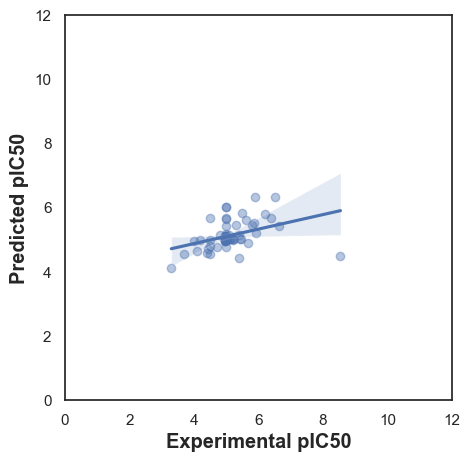

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
# ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show